In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
X = df.drop(columns=["diagnosis", "Unnamed: 32"])
X.head()
y = df.iloc[:,1]
y.head()

# total X and y
print(X.shape)
print(y.shape)

(569, 31)
(569,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (455, 31)
X_test shape: (114, 31)
y_train shape: (455,)
y_test shape: (114,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, export_graphviz
rfc = RandomForestClassifier(random_state=42)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [11]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [13]:
importances = rfc.feature_importances_
print(importances)
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

[0.00451261 0.02650462 0.01286653 0.05084281 0.04056064 0.0075004
 0.01809762 0.05098022 0.08688499 0.00325459 0.00523394 0.01350438
 0.00530798 0.01719734 0.03425835 0.00456684 0.00656505 0.00893867
 0.00527137 0.00569935 0.00680829 0.0979717  0.01547694 0.1324522
 0.12541418 0.01150731 0.01949164 0.05298251 0.10819714 0.01433672
 0.00681308]
id: 0.004512611023625936
radius_mean: 0.026504624627295147
texture_mean: 0.012866531436604989
perimeter_mean: 0.05084280644969702
area_mean: 0.04056064146488961
smoothness_mean: 0.0075004024422891625
compactness_mean: 0.018097619296440687
concavity_mean: 0.050980217464886714
concave points_mean: 0.08688498882946928
symmetry_mean: 0.0032545856548487507
fractal_dimension_mean: 0.005233936270450871
radius_se: 0.013504378229687367
texture_se: 0.005307977784101148
perimeter_se: 0.017197336007647945
area_se: 0.03425835402883133
smoothness_se: 0.004566838051468002
compactness_se: 0.006565049959452274
concavity_se: 0.008938673992692912
concave points_se:

[Text(0.45, 0.9285714285714286, 'concavity_se <= 0.024\ngini = 0.47\nsamples = 281\nvalue = [283, 172]'),
 Text(0.3, 0.7857142857142857, 'radius_se <= 0.534\ngini = 0.185\nsamples = 133\nvalue = [200, 23]'),
 Text(0.25, 0.6428571428571429, 'concave points_worst <= 0.132\ngini = 0.13\nsamples = 129\nvalue = [200, 15]'),
 Text(0.2, 0.5, 'radius_mean <= 15.02\ngini = 0.065\nsamples = 124\nvalue = [200, 7]'),
 Text(0.1, 0.35714285714285715, 'symmetry_worst <= 0.288\ngini = 0.01\nsamples = 116\nvalue = [191, 1]'),
 Text(0.05, 0.21428571428571427, 'gini = 0.0\nsamples = 84\nvalue = [142, 0]'),
 Text(0.15, 0.21428571428571427, 'perimeter_worst <= 115.4\ngini = 0.039\nsamples = 32\nvalue = [49, 1]'),
 Text(0.1, 0.07142857142857142, 'gini = 0.0\nsamples = 31\nvalue = [49, 0]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.35714285714285715, 'texture_worst <= 19.91\ngini = 0.48\nsamples = 8\nvalue = [9, 6]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.

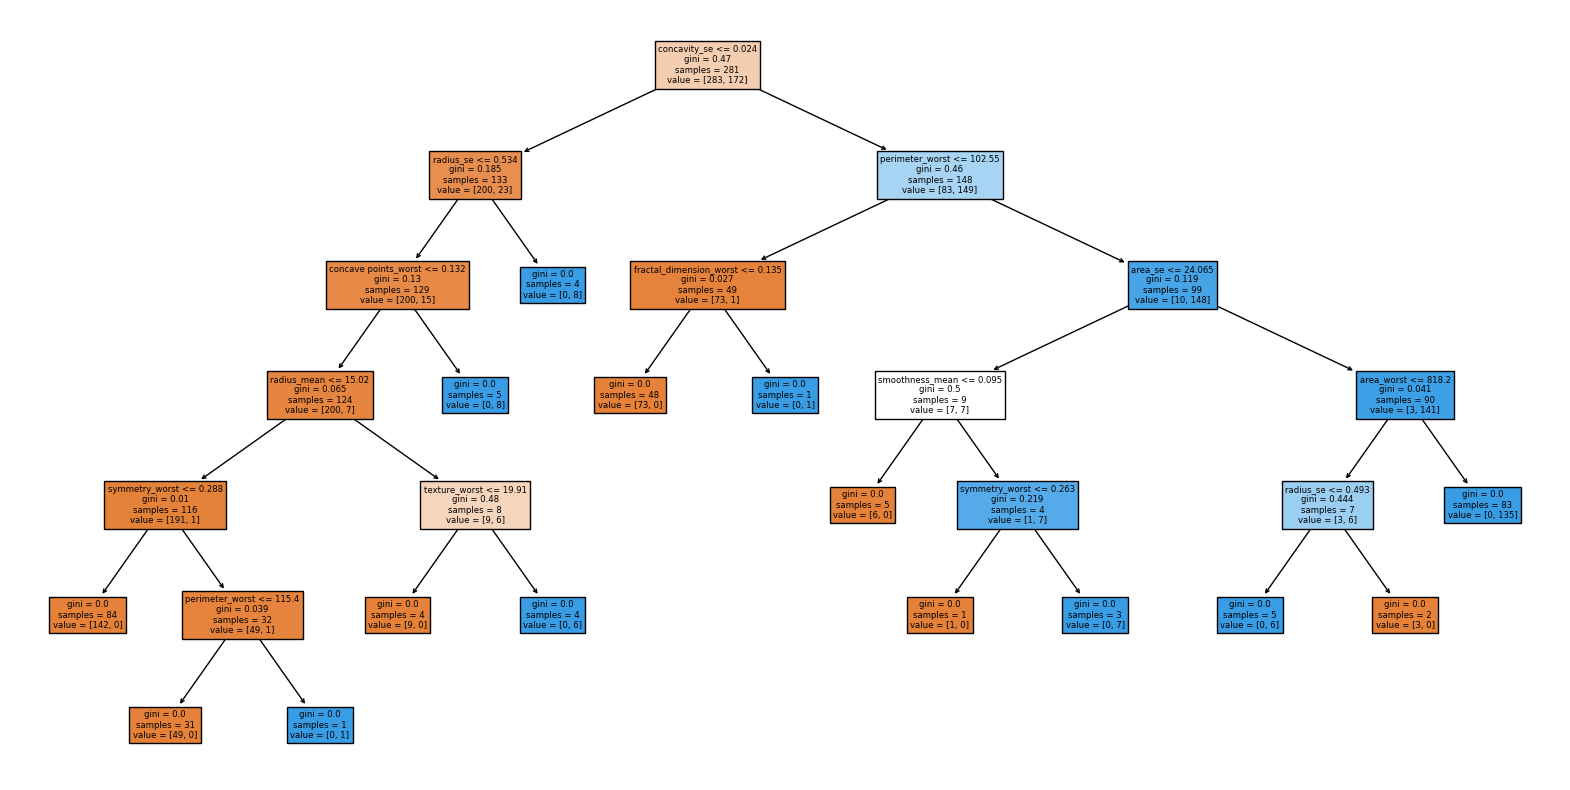

In [15]:
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(rfc.estimators_[0], feature_names=X.columns.to_list(), filled=True)
